# Exploratory Data Analysis of Heart Disease Datasets
In this notebook, we will explore the **heart disease datasets** selected by the group<sup>1</sup> as part of Assignment \#5 for Data 1205 (Data Visualization) module.
The goal is to create a **`Discovery` Data Narative** for a particular dataset(s). The group will find the dataset, cleanse and manupilate the data, and create compelling visualizations. All of these steps will be presented to the lecturer through a recorded video presentation.

<br></br><sup>1</sup>*Group members*: **_Gantavya Banga, Raj Dholakia_**

# Table of Contents
* [1. The Datasets](#dataset-information)
* [2. Loading Data](#loading-data)
* [3. Modifying the WHO dataset](#modifying-who-data)
* [4. Training and Evaluating the Models](#training-model)

<a id="dataset-information"></a>
## 1. The Datasets
**Heart Disease datasets** used for this assignment are:
1. `WHO` ([World Health Organization](https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-leading-causes-of-death)): The dataset consists the global health estimates with focus on the leading causes of death. The dataset spans from 2000-2019 and is segragated into all WHO member nations.
2. `NVSS` ([National Vital Statistics System](https://data.world/us-hhs-gov/52a72720-5ce6-45e1-a7a3-26dff759fc4b)): The dataset contains heart disease mortality rates in the US between `2015` and `2017`. The data has beeen processed in the following ways:
    - 3-year average.
    - Rates are age-standardized.
    - County rates are spatially smoothed.
    - The data can be viewed by gender and race/ethnicity.
    - Additional data, maps, and methodology can be viewed on the [Interactive Atlas of Heart Disease and Stroke](http://www.cdc.gov/dhdsp/maps/atlas)
    <br></br>_Source: Data World._
3. UCI ([UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)): A description from the website is as follows: _"This database contains **76 attributes**, but all published experiments refer to **using a subset of 14 of them**. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)."_

<a id="loading-data"></a>
## 2. Loading Data

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pathlib
import os
import datetime

# This module provides a progress bar when dealing with loops.
from tqdm import tqdm

In [2]:
# Defining the directory that contains all datasets
data_dir = pathlib.Path("Data")

# Check if directory exists
if not data_dir.exists():
    raise FileNotFoundError(f"No data directory named {data_dir} found.")

# Defining datasets
datasets = {
    "WHO": data_dir / "GHE2019_Deaths-2019-country.xlsx",
    "NVSS": data_dir / "Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2016-2018.csv",
    "UCI": data_dir / "Heart_Disease_Prediction.csv"
}

# Check if all the datasets exist
for dataset_name, path in datasets.items():
    if not path.exists():
        raise FileNotFoundError(f"Dataset {dataset_name} was not found.")
    else:
        print(f"{dataset_name} Dataset Found.")

WHO Dataset Found.
NVSS Dataset Found.
UCI Dataset Found.


In [3]:
# Create dataframes
dataset_dfs = {"WHO": pd.DataFrame(),
               "NVSS": pd.DataFrame(),
               "UCI": pd.DataFrame()}

for dataset_name, dataset in dataset_dfs.items():
    if datasets[dataset_name].exists():
        if datasets[dataset_name].suffix == '.csv':
            dataset_dfs[dataset_name] = pd.read_csv(datasets[dataset_name])
            print(f"{dataset_name} Dataset Loaded.")
        elif datasets[dataset_name].suffix == '.xlsx':
            dataset_dfs[dataset_name] = pd.read_excel(datasets[dataset_name])
            print(f"{dataset_name} Dataset Loaded.")

    else:
        raise FileNotFoundError(f"Dataset {dataset_name} was not found.")


WHO Dataset Loaded.
NVSS Dataset Loaded.
UCI Dataset Loaded.


> Viewing the top 5 rows for each dataset.

In [4]:
dataset_dfs["NVSS"].head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,243.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,337.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662


In [5]:
dataset_dfs["UCI"].head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
dataset_dfs['WHO'].head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,GLOBAL HEALTH ESTIMATES 2019 SUMMARY TABLES\nD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.who.int/data/gho/data/themes/morta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="modifying-who-data"></a>
## Modifying the WHO dataset
The dataset obtained from WHO is formatted in a way that **cannot** be easily converted to a Pandas DataFrame. It requires some data cleansing in the excel document and then involves some data manupilation to obtained a DataFrame that can be analysed.

The following is what the Excel sheet looks like:
![Orginal Excel Shee](Images/screenshot_original_sheet.png)

In Excel, the following steps were carried out:
1. A new sheet is created, called `Summary Sheet`.
2. Data with its headers is copied from `All Deaths` sheet.
3. The data is pasted and the coutnry labels removed.
4. Any other row(s) or column(s) which are not needed are removed, like the `GHE code` column.
5. Add `0` for `population` and `All Causes` rows under `GHE cause`. This is to ensure missing values can be filled easily.
6. The data is then loaded below.

What the final summary sheet looks like:
![Summary Sheet](Images/screenshot_summary_sheet.png)

In [7]:
# Loading summary sheet from the excel document
who_dataset = pd.read_excel(datasets["WHO"], sheet_name="Summary Sheet")
who_dataset

,Sex,Unnamed: 1,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,I.,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,NaN,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,NaN,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Females,NaN,NaN,8.,Other unintentional injuries,NaN,1.23321,0.035055,0.47559,1.000655,...,1.839001,10.972379,0.394786,0.36418,0.008212,0.56181,1.878499,0.7981,0.641647,0.662551
611,Females,NaN,B.,Intentional injuries,NaN,NaN,14.064851,0.06776,0.563781,0.902505,...,1.723971,16.159785,0.209317,0.911984,0.013003,1.36611,2.460579,5.293909,0.530183,1.083053
612,Females,NaN,NaN,1.,Self-harm,NaN,0.667653,0.037885,0.390353,0.369492,...,0.566437,12.412987,0.159085,0.794494,0.011294,0.099759,2.249085,0.672016,0.240562,0.673381
613,Females,NaN,NaN,2.,Interpersonal violence,NaN,0.62116,0.029722,0.166617,0.525239,...,1.146993,3.679265,0.050048,0.11563,0.001694,1.264646,0.206339,0.749774,0.28747,0.402379


In [8]:
# Fill missing values and 
# Update column values into numercial categorical values
# 1. Communicable Diseases
# 2. Noncommunicable Diseases
# 3. Injuries
who_dataset.insert(loc=2,
                   column="Main Category",
                   value=who_dataset["Unnamed: 1"].fillna(method="ffill").replace({"I.": 1,
                                                                                   "II.": 2,
                                                                                   "III.": 3}))
who_dataset.drop("Unnamed: 1", axis=1, inplace=True)

In [9]:
who_dataset

,Sex,Main Category,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,1,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,1,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,1,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Females,3,NaN,8.,Other unintentional injuries,NaN,1.23321,0.035055,0.47559,1.000655,...,1.839001,10.972379,0.394786,0.36418,0.008212,0.56181,1.878499,0.7981,0.641647,0.662551
611,Females,3,B.,Intentional injuries,NaN,NaN,14.064851,0.06776,0.563781,0.902505,...,1.723971,16.159785,0.209317,0.911984,0.013003,1.36611,2.460579,5.293909,0.530183,1.083053
612,Females,3,NaN,1.,Self-harm,NaN,0.667653,0.037885,0.390353,0.369492,...,0.566437,12.412987,0.159085,0.794494,0.011294,0.099759,2.249085,0.672016,0.240562,0.673381
613,Females,3,NaN,2.,Interpersonal violence,NaN,0.62116,0.029722,0.166617,0.525239,...,1.146993,3.679265,0.050048,0.11563,0.001694,1.264646,0.206339,0.749774,0.28747,0.402379


In [10]:
# Create a dataframe with category alphabet and names
key_value_pair = who_dataset[["Main Category", "GHE cause", "Unnamed: 3"]].dropna().drop_duplicates()

# Make the dataframe with the right index values
sub_category_df = pd.DataFrame()
sub_category_df["Main Category"] = key_value_pair["Main Category"]
sub_category_df["Sub-category 1"] = key_value_pair["GHE cause"]
sub_category_df["Name"] = key_value_pair["Unnamed: 3"]
sub_category_df.set_index(["Main Category", "Sub-category 1"], inplace=True)

# View the dataframe created
sub_category_df

Name
Main Category Sub-category 1                                    
1             A.               Infectious and parasitic diseases
              B.                         Respiratory Infectious 
              C.                             Maternal conditions
              D.                             Neonatal conditions
              E.                        Nutritional deficiencies
2             A.                             Malignant neoplasms
              B.                                 Other neoplasms
              C.                               Diabetes mellitus
              D.              Endocrine, blood, immune disorders
              E.              Mental and substance use disorders
              F.                         Neurological conditions
              G.                            Sense organ diseases
              H.                         Cardiovascular diseases
              I.                            Respiratory diseases
              J.                              Digestive diseases
              K.                          Genitourinary diseases
              L.                                   Skin diseases
              M.                        Musculoskeletal diseases
              N.                            Congenital anomalies
              O.                                 Oral conditions
              P.                    Sudden infant death syndrome
3             A.                          Unintentional injuries
              B.                            Intentional injuries

In [11]:
# Creating a trimmed version of the dataset
who_dataset_trimmed = who_dataset.loc[who_dataset["GHE cause"].dropna().index].\
    drop(["Unnamed: 3", "Unnamed: 4", "Member State\n(See Notes for explanation of colour codes)"], axis=1).copy()

# Set index according to the categorical values
who_dataset_trimmed.set_index(["Sex", "Main Category", "GHE cause"], inplace=True)

In [12]:
who_dataset_trimmed

Afghanistan  \
Sex     Main Category GHE cause                                                        
Persons 0             Population ('000) (2)                                    38042   
                      All Causes                                           254.80991   
        1             Communicable, maternal, perinatal and nutrition...   83.910054   
                      A.                                                   28.908938   
                      B.                                                   14.659211   
...                                                                              ...   
Females 2             O.                                                           .   
                      P.                                                    0.195891   
        3             Injuries                                             17.603264   
                      A.                                                    3.538413   
                      B.                                                   14.064851   

                                                                            Albania  \
Sex     Main Category GHE cause                                                       
Persons 0             Population ('000) (2)                                    2881   
                      All Causes                                          31.154185   
        1             Communicable, maternal, perinatal and nutrition...   0.941825   
                      A.                                                    0.12468   
                      B.                                                   0.645985   
...                                                                             ...   
Females 2             O.                                                          .   
                      P.                                                   0.000421   
        3             Injuries                                             0.290402   
                      A.                                                   0.222642   
                      B.                                                    0.06776   

                                                                             Algeria  \
Sex     Main Category GHE cause                                                        
Persons 0             Population ('000) (2)                                    43053   
                      All Causes                                          203.300382   
        1             Communicable, maternal, perinatal and nutrition...   26.397358   
                      A.                                                    5.431372   
                      B.                                                     7.29088   
...                                                                              ...   
Females 2             O.                                                           .   
                      P.                                                    0.090635   
        3             Injuries                                              5.010705   
                      A.                                                    4.446923   
                      B.                                                    0.563781   

                                                                              Angola  \
Sex     Main Category GHE cause                                                        
Persons 0             Population ('000) (2)                                    31825   
                      All Causes                                          228.819281   
        1             Communicable, maternal, perinatal and nutrition...  135.374688   
                      A.                                                   72.403294   
                      B.                                                   25.035302   
...                                

Some of the variables are a `.`. From the documentation provided by WHO along with their dataset, `.` is equal to a `0`. Hence, the variables will be updated and converted to `float` in the following cell.

In [13]:
# Convert `object values` to `float` values
who_dataset_modified1 = pd.DataFrame()

for column in who_dataset_trimmed.columns:
    who_dataset_modified1[column] = pd.to_numeric(who_dataset_trimmed[column].replace({'.': 0}),
                                                  downcast="float",
                                                  errors="coerce")

# A transposed version of the dataframe will be used for further analysis.
who_dataset_modified1.T

Sex                                              Persons              \
Main Category                                          0               
GHE cause                          Population ('000) (2)  All Causes   
Afghanistan                                      38042.0  254.809906   
Albania                                           2881.0   31.154184   
Algeria                                          43053.0  203.300385   
Angola                                           31825.0  228.819275   
Antigua and Barbuda                                 97.0    0.651185   
...                                                  ...         ...   
Venezuela (Bolivarian Republic of)               28516.0  172.089951   
Viet Nam                                         96462.0  727.941162   
Yemen                                            29162.0  170.039093   
Zambia                                           17861.0  121.104858   
Zimbabwe                                         14645.0  117.709801   

Sex                                                                                              \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Afghanistan                                                                 83.910057             
Albania                                                                      0.941825             
Algeria                                                                     26.397358             
Angola                                                                     135.374695             
Antigua and Barbuda                                                          0.064040             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          26.780209             
Viet Nam                                                                    67.734497             
Yemen                                                                       51.259296             
Zambia                                                                      68.445869             
Zimbabwe                                                                    56.085545             

Sex                                                                            \
Main Category                                                                   
GHE cause                                  A.         B.        C.         D.   
Afghanistan                         28.908937  14.659210  7.806885  31.919039   
Albania                              0.124680   0.645985  0.001975   0.164791   
Algeria                              5.431373   7.290880  0.916694  12.656338   
Angola                              72.403290  25.035301  3.267900  31.044147   
Antigua and Barbuda                  0.030165   0.023675  0.000433   0.003271   
...                                       ...        ...       ...        ...   
Venezuela (Bolivarian Republic of)  12.649732   7.190808  0.422176   5.742914   
Viet Nam                            26.273970  27.870731  0.773028  11.494572   
Yemen                               16.132111  11.983312  0.889804  21.121099   
Zambia                              42.295750   9.589533  1.187941  13.001028   
Zimbabwe                            31.549055  10.847826  1.749061   9.516352   

Sex                                                                    \
Main Category                                                       2   
GHE cause                                 E. Noncommunicable diseases   
Afghanistan                         0.615982               126.847137   
Albania                             0.004394                29.266520   
Algeria                             0.102073               161.330139   
Angola                         

In [14]:
# Creating a transposed dataframe
who_dataset_modified2 = pd.DataFrame()
who_dataset_modified2 = who_dataset_modified1.T
who_dataset_modified2["Country"] = who_dataset_modified1.T.index
who_dataset_modified2.set_index("Country", inplace=True)
who_dataset_modified2

Sex                                              Persons              \
Main Category                                          0               
GHE cause                          Population ('000) (2)  All Causes   
Country                                                                
Afghanistan                                      38042.0  254.809906   
Albania                                           2881.0   31.154184   
Algeria                                          43053.0  203.300385   
Angola                                           31825.0  228.819275   
Antigua and Barbuda                                 97.0    0.651185   
...                                                  ...         ...   
Venezuela (Bolivarian Republic of)               28516.0  172.089951   
Viet Nam                                         96462.0  727.941162   
Yemen                                            29162.0  170.039093   
Zambia                                           17861.0  121.104858   
Zimbabwe                                         14645.0  117.709801   

Sex                                                                                              \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Country                                                                                           
Afghanistan                                                                 83.910057             
Albania                                                                      0.941825             
Algeria                                                                     26.397358             
Angola                                                                     135.374695             
Antigua and Barbuda                                                          0.064040             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          26.780209             
Viet Nam                                                                    67.734497             
Yemen                                                                       51.259296             
Zambia                                                                      68.445869             
Zimbabwe                                                                    56.085545             

Sex                                                                            \
Main Category                                                                   
GHE cause                                  A.         B.        C.         D.   
Country                                                                         
Afghanistan                         28.908937  14.659210  7.806885  31.919039   
Albania                              0.124680   0.645985  0.001975   0.164791   
Algeria                              5.431373   7.290880  0.916694  12.656338   
Angola                              72.403290  25.035301  3.267900  31.044147   
Antigua and Barbuda                  0.030165   0.023675  0.000433   0.003271   
...                                       ...        ...       ...        ...   
Venezuela (Bolivarian Republic of)  12.649732   7.190808  0.422176   5.742914   
Viet Nam                            26.273970  27.870731  0.773028  11.494572   
Yemen                               16.132111  11.983312  0.889804  21.121099   
Zambia                              42.295750   9.589533  1.187941  13.001028   
Zimbabwe                            31.549055  10.847826  1.749061   9.516352   

Sex                                                                    \
Main Category                                                       2   
GHE cause                                 E. Noncommunicable diseases  

In [15]:
# Understand the dataframe
who_dataset_modified2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 84 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   (Persons, 0, Population ('000) (2))                                         183 non-null    float32
 1   (Persons, 0, All Causes)                                                    183 non-null    float32
 2   (Persons, 1, Communicable, maternal, perinatal and nutritional conditions)  183 non-null    float32
 3   (Persons, 1, A.)                                                            183 non-null    float32
 4   (Persons, 1, B.)                                                            183 non-null    float32
 5   (Persons, 1, C.)                                                            183 non-null    float32
 6   (Persons, 1, D.)                        

In [16]:
who_dataset_modified3 = who_dataset_modified2[[
    ("Males", 1, "Communicable, maternal, perinatal and nutritional conditions"),
    ("Males", 2, "Noncommunicable diseases"),
    ("Males", 3, "Injuries"),
    ("Females", 1, "Communicable, maternal, perinatal and nutritional conditions"),
    ("Females", 2, "Noncommunicable diseases"),
    ("Females", 3, "Injuries")  
]].copy()

who_dataset_modified3["Total Deaths"] = who_dataset_modified2[("Persons", 0, "All Causes")]
who_dataset_modified3["Country"] = who_dataset_modified2.index
who_dataset_modified3.round(2)

Sex                                                                                       Males  \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Country                                                                                           
Afghanistan                                                                 40.310001             
Albania                                                                      0.470000             
Algeria                                                                     13.870000             
Angola                                                                      71.160004             
Antigua and Barbuda                                                          0.030000             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          14.230000             
Viet Nam                                                                    40.070000             
Yemen                                                                       27.690001             
Zambia                                                                      35.869999             
Zimbabwe                                                                    29.270000             

Sex                                                                     \
Main Category                                             2          3   
GHE cause                          Noncommunicable diseases   Injuries   
Country                                                                  
Afghanistan                                       60.189999  26.450001   
Albania                                           13.630000   0.660000   
Algeria                                           83.750000  10.560000   
Angola                                            39.400002  13.970000   
Antigua and Barbuda                                0.280000   0.030000   
...                                                     ...        ...   
Venezuela (Bolivarian Republic of)                57.709999  29.010000   
Viet Nam                                         319.179993  45.639999   
Yemen                                             43.669998  22.820000   
Zambia                                            22.719999   7.390000   
Zimbabwe                                          20.459999  10.910000   

Sex                                                                                     Females  \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Country                                                                                           
Afghanistan                                                                 43.599998             
Albania                                                                      0.470000             
Algeria                                                                     12.530000             
Angola                                                                      64.209999             
Antigua and Barbuda                                                          0.030000             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          12.550000             
Viet Nam                                                                    27.670000             
Yemen                                                                       23.570000             
Zambia                                                                      32.570000             
Zimbabwe         

In [18]:
all_deaths_per_capita = (who_dataset_modified1.T["Persons"][0].drop("Population ('000) (2)", axis=1).T.sum() / who_dataset_modified1.T["Persons"][0]["Population ('000) (2)"]) * 100
all_deaths_per_capita.sort_values(ascending=False)

Lesotho                 1.681087
Latvia                  1.561768
Lithuania               1.521360
Bulgaria                1.516902
Ukraine                 1.350924
                          ...   
Bahrain                 0.281700
Maldives                0.250118
United Arab Emirates    0.214230
Kuwait                  0.195873
Qatar                   0.160180
Length: 183, dtype: float32

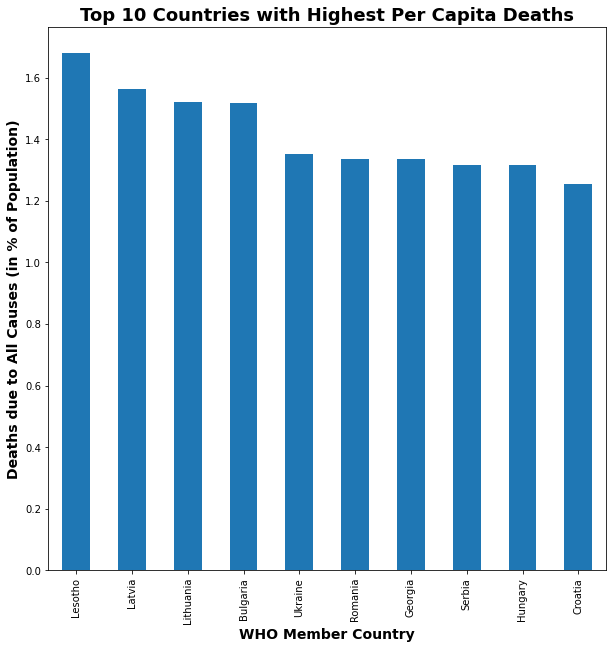

In [19]:
ax = all_deaths_per_capita.sort_values(ascending=False).iloc[:10].\
    plot(kind='bar',
         figsize=(10,10))

ax.set_ylabel("Deaths due to All Causes (in % of Population)",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("WHO Member Country",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_title("Top 10 Countries with Highest Per Capita Deaths",
             fontdict={"size": 18,
                        "weight": "bold"});

In [20]:
df = pd.concat([sub_category_df, who_dataset_modified1.T["Persons"][[1,2,3]].\
                    drop([(1, "Communicable, maternal, perinatal and nutritional conditions"),
                          (2, "Noncommunicable diseases"),
                          (3, "Injuries")], axis=1).sum()],
               axis=1)

deaths_by_subcategory = pd.DataFrame()
deaths_by_subcategory["Cause"] = df["Name"]
deaths_by_subcategory["Deaths"] = df[0]


df = None
deaths_by_subcategory

Cause        Deaths
Main Category                                                     
1             A.   Infectious and parasitic diseases   5101.199707
              B.             Respiratory Infectious    2603.912842
              C.                 Maternal conditions    196.007507
              D.                 Neonatal conditions   2037.549072
              E.            Nutritional deficiencies    262.737122
2             A.                 Malignant neoplasms   9296.640625
              B.                     Other neoplasms    138.472015
              C.                   Diabetes mellitus   1496.094238
              D.  Endocrine, blood, immune disorders    316.274231
              E.  Mental and substance use disorders    347.477173
              F.             Neurological conditions   2299.307617
              G.                Sense organ diseases      0.739300
              H.             Cardiovascular diseases  17863.828125
              I.                Respiratory diseases   4136.898438
              J.                  Digestive diseases   2454.999756
              K.              Genitourinary diseases   1641.798706
              L.                       Skin diseases     96.580887
              M.            Musculoskeletal diseases    151.344879
              N.                Congenital anomalies    532.854248
              O.                     Oral conditions      1.236247
              P.        Sudden infant death syndrome     30.205030
3             A.              Unintentional injuries   3159.246582
              B.                Intentional injuries   1250.368164

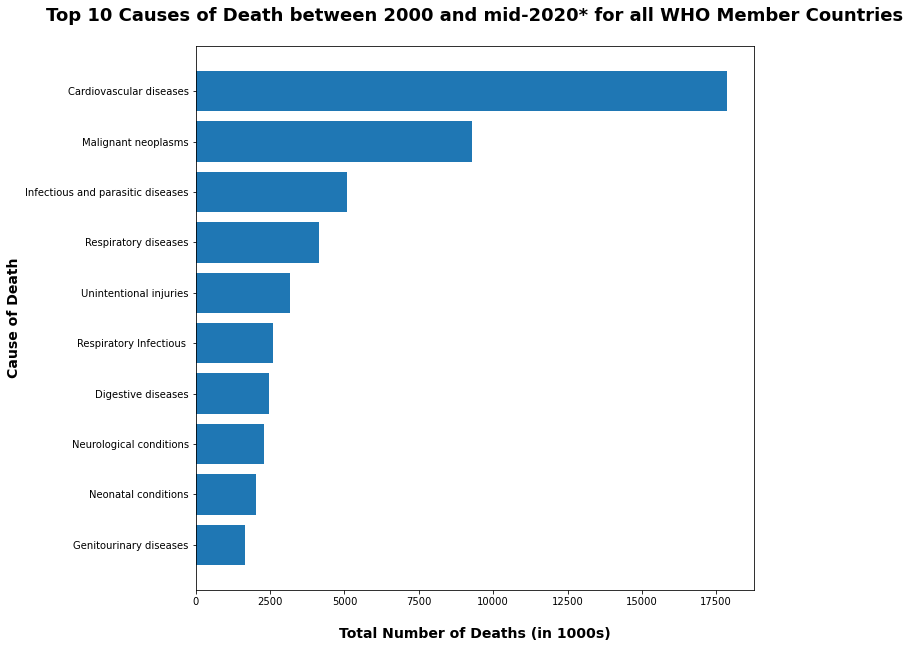

In [21]:
top10_causes = deaths_by_subcategory.sort_values(by="Deaths", ascending=False).iloc[:10]
x = top10_causes["Cause"]
y = top10_causes["Deaths"]

fig, ax = plt.subplots(figsize=(10,10))

ax.barh(y=x, width=y)
plt.gca().invert_yaxis()

ax.set_ylabel("Cause of Death",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("Total Number of Deaths (in 1000s)",
              fontdict={"size": 14,
                        "weight": "bold"},
              labelpad=20)

ax.set_title("Top 10 Causes of Death between 2000 and mid-2020* for all WHO Member Countries",
             fontdict={"size": 18,
                        "weight": "bold"},
             pad=25);

In [23]:
noncom_deaths_per_capita = who_dataset_modified1.T["Persons"][2].drop("Noncommunicable diseases", axis=1).T.sum() / who_dataset_modified1.T["Persons"][0]["Population ('000) (2)"]
noncom_deaths_per_capita

Afghanistan                           0.003334
Albania                               0.010158
Algeria                               0.003747
Angola                                0.002283
Antigua and Barbuda                   0.005692
                                        ...   
Venezuela (Bolivarian Republic of)    0.003926
Viet Nam                              0.006140
Yemen                                 0.002937
Zambia                                0.002359
Zimbabwe                              0.003155
Length: 183, dtype: float32

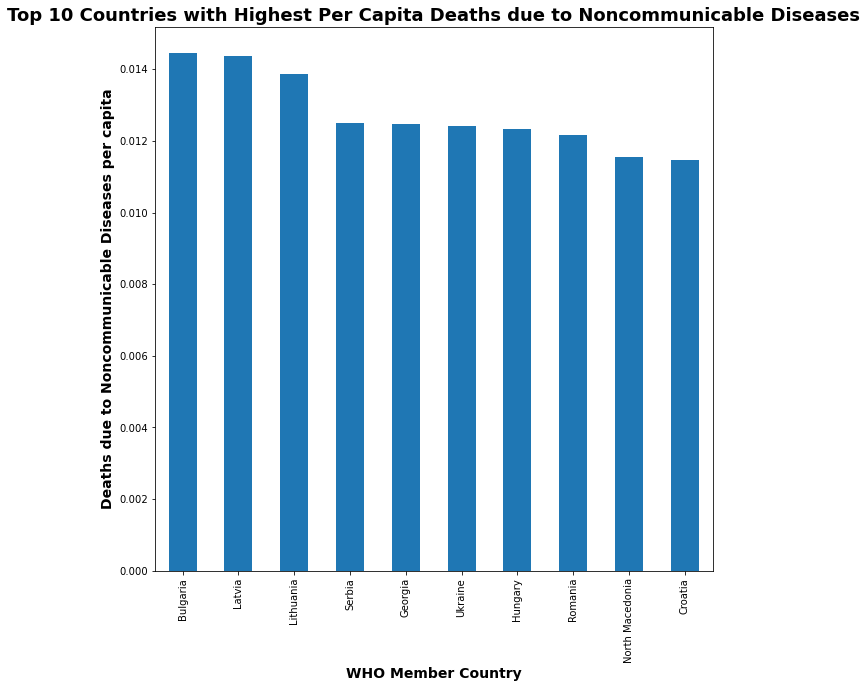

In [24]:
ax = noncom_deaths_per_capita.sort_values(ascending=False).iloc[:10].\
    plot(kind='bar',
         figsize=(10,10))

ax.set_ylabel("Deaths due to Noncommunicable Diseases per capita",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("WHO Member Country",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_title("Top 10 Countries with Highest Per Capita Deaths due to Noncommunicable Diseases",
             fontdict={"size": 18,
                        "weight": "bold"});

In [25]:
who_dataset.head()

,Sex,Main Category,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,1,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,1,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,1,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064


In [27]:
who_dataset_modified1.head()

Afghanistan  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               38042.000000   
                      All Causes                                            254.809906   
        1             Communicable, maternal, perinatal and nutrition...     83.910057   
                      A.                                                     28.908937   
                      B.                                                     14.659210   

                                                                              Albania  \
Sex     Main Category GHE cause                                                         
Persons 0             Population ('000) (2)                               2881.000000   
                      All Causes                                            31.154184   
        1             Communicable, maternal, perinatal and nutrition...     0.941825   
                      A.                                                     0.124680   
                      B.                                                     0.645985   

                                                                               Algeria  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               43053.000000   
                      All Causes                                            203.300385   
        1             Communicable, maternal, perinatal and nutrition...     26.397358   
                      A.                                                      5.431373   
                      B.                                                      7.290880   

                                                                                Angola  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               31825.000000   
                      All Causes                                            228.819275   
        1             Communicable, maternal, perinatal and nutrition...    135.374695   
                      A.                                                     72.403290   
                      B.                                                     25.035301   

                                                                          Antigua and Barbuda  \
Sex     Main Category GHE cause                                                                 
Persons 0             Population ('000) (2)                                         97.000000   
                      All Causes                                                     0.651185   
        1             Communicable, maternal, perinatal and nutrition...             0.064040   
                      A.                                                             0.030165   
                      B.                                                             0.023675   

                                                                             Argentina  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               44781.000000   
                      All Causes                                            348.916412   
        1             Communicable, maternal, perinatal and nutrition...     61.397060   
                      A.                                                     15.005384   
                      B.                                                     40.999798   

                                                                              Armenia  \
Sex     Main Category GHE cause                                                         
Persons 0             Population ('000) (2)                          

In [28]:
df1 = who_dataset.query("`Main Category` != 0")[["Main Category", "GHE cause", "Unnamed: 3", "Unnamed: 4", "Member State\n(See Notes for explanation of colour codes)"]]
df1["GHE cause"] = df1["GHE cause"].fillna(method='ffill')
df1.insert(loc=2,
           column="Sub-category 1",
           value=df1["Unnamed: 3"].fillna(method='ffill'))
df1.insert(loc=3,
           column="Sub-category 2",
           value=df1["Unnamed: 4"])
df1.insert(loc=4,
           column="Sub-category 3",
           value=df1["Member State\n(See Notes for explanation of colour codes)"])

df1.drop(["Unnamed: 3",
          "Unnamed: 4",
          "Member State\n(See Notes for explanation of colour codes)"],
         axis=1,
         inplace=True)

df1.set_index(["Main Category",
               "GHE cause",
               "Sub-category 1"], inplace=True)
# df1[df1["GHE cause"] == "H."]
df1

Sub-category 2  \
Main Category GHE cause                                          Sub-category 1                                                                  
1             Communicable, maternal, perinatal and nutrition... NaN                                                                       NaN   
              A.                                                 Infectious and parasitic diseases                                         NaN   
                                                                 1.                                                               Tuberculosis   
                                                                 2.                                                         STDs excluding HIV   
                                                                 2.                                                                         a.   
...                                                                                                                                        ...   
3             A.                                                 8.                                               Other unintentional injuries   
              B.                                                 Intentional injuries                                                      NaN   
                                                                 1.                                                                  Self-harm   
                                                                 2.                                                     Interpersonal violence   
                                                                 3.                                 Collective violence and legal intervention   

                                                                                                   Sub-category 3  
Main Category GHE cause                                          Sub-category 1                                    
1             Communicable, maternal, perinatal and nutrition... NaN                                          NaN  
              A.                                                 Infectious and parasitic diseases            NaN  
                                                                 1.                                           NaN  
                                                                 2.                                           NaN  
                                                                 2.                                      Syphilis  
...                                                                                                           ...  
3             A.                                                 8.                                           NaN  
              B.                                                 Intentional injuries                         NaN  
                                                                 1.                                           NaN  
                                                                 2.                                           NaN  
                                                                 3.                                           NaN  

[609 rows x 2 columns]

In [29]:
df2 = who_dataset.copy()
df2["GHE cause"] = df2["GHE cause"].fillna(method='ffill')
df2.insert(loc=3,
           column="Sub-category 1",
           value=df2["Unnamed: 3"].fillna(method='ffill'))
df2.insert(loc=4,
           column="Sub-category 2",
           value=df2["Unnamed: 4"])
df2.insert(loc=5,
           column="Sub-category 3",
           value=df2["Member State\n(See Notes for explanation of colour codes)"])

df2.drop(["Main Category",
          "Unnamed: 3",
          "Unnamed: 4",
          "Member State\n(See Notes for explanation of colour codes)"],
         axis=1,
         inplace=True)

df3 = df2[df2["GHE cause"] == "H."].drop("GHE cause", axis=1).fillna("").set_index(["Sex", "Sub-category 1", "Sub-category 2", "Sub-category 3"]).T
df3["Country"] = df3.index
df3.set_index("Country").to_excel((data_dir / "processed_GHE_dataset.xlsx"),
                               sheet_name="Cardiovascular Disease Breakdown")

/Users/raj/Documents/Canada/Durham/1205-Visualizations_Leadership_and_Business/Assignments/assignment_5/env/lib/python3.8/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [30]:
# Create a dataframe with category alphabet and names
key_value_pair2 = who_dataset[["Main Category", "GHE cause", "Unnamed: 3", "Unnamed: 4"]].loc

# Make the dataframe with the right index values
sub_category2_df = pd.DataFrame()
sub_category2_df["Main Category"] = key_value_pair2["Main Category"]
sub_category2_df["Sub-category 1"] = key_value_pair2["GHE cause"]
sub_category2_df["Sub-category 2"] = key_value_pair2["Unnamed: 3"]
sub_category2_df["Name"] = key_value_pair2["Unnamed: 4"]
sub_category2_df.set_index(["Main Category", "Sub-category 1", "Sub-category 2"], inplace=True)

# View the dataframe created
sub_category2_df

KeyError: 'Main Category'

In [31]:
who_dataset_modified3.head()

Sex                                                                        Males  \
Main Category                                                                  1   
GHE cause           Communicable, maternal, perinatal and nutritional conditions   
Country                                                                            
Afghanistan                                                  40.310074             
Albania                                                       0.467103             
Algeria                                                      13.871757             
Angola                                                       71.164291             
Antigua and Barbuda                                           0.034943             

Sex                                                      \
Main Category                              2          3   
GHE cause           Noncommunicable diseases   Injuries   
Country                                                   
Afghanistan                        60.188889  26.449455   
Albania                            13.628529   0.655438   
Algeria                            83.746147  10.562186   
Angola                             39.403198  13.965070   
Antigua and Barbuda                 0.275547   0.026448   

Sex                                                                      Females  \
Main Category                                                                  1   
GHE cause           Communicable, maternal, perinatal and nutritional conditions   
Country                                                                            
Afghanistan                                                  43.599979             
Albania                                                       0.474722             
Algeria                                                      12.525601             
Angola                                                       64.210396             
Antigua and Barbuda                                           0.029097             

Sex                                                     Total Deaths  \
Main Category                              2          3                
GHE cause           Noncommunicable diseases   Injuries                
Country                                                                
Afghanistan                        66.658249  17.603264   254.809906   
Albania                            15.637991   0.290402    31.154184   
Algeria                            77.583992   5.010705   203.300385   
Angola                             33.245644   6.830684   228.819275   
Antigua and Barbuda                 0.276612   0.008539     0.651185   

Sex                              Country  
Main Category                             
GHE cause                                 
Country                                   
Afghanistan                  Afghanistan  
Albania                          Albania  
Algeria                          Algeria  
Angola                            Angola  
Antigua and Barbuda  Antigua and Barbuda

In [32]:
# Save all the important dataframes to different sheets in an Excel Workbook

with pd.ExcelWriter((data_dir / "processed_GHE_dataset.xlsx")) as writer: 
    who_dataset_modified2.to_excel(writer,
                                   sheet_name="All Deaths sheet")
    df3.set_index("Country").to_excel(writer,
                                      sheet_name="Cardiovascular Breakdown")
    sub_category_df.to_excel(writer,
                             sheet_name="Sub-category 1 index")

In [33]:
who_dataset

,Sex,Main Category,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,1,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,1,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,1,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Females,3,NaN,8.,Other unintentional injuries,NaN,1.23321,0.035055,0.47559,1.000655,...,1.839001,10.972379,0.394786,0.36418,0.008212,0.56181,1.878499,0.7981,0.641647,0.662551
611,Females,3,B.,Intentional injuries,NaN,NaN,14.064851,0.06776,0.563781,0.902505,...,1.723971,16.159785,0.209317,0.911984,0.013003,1.36611,2.460579,5.293909,0.530183,1.083053
612,Females,3,NaN,1.,Self-harm,NaN,0.667653,0.037885,0.390353,0.369492,...,0.566437,12.412987,0.159085,0.794494,0.011294,0.099759,2.249085,0.672016,0.240562,0.673381
613,Females,3,NaN,2.,Interpersonal violence,NaN,0.62116,0.029722,0.166617,0.525239,...,1.146993,3.679265,0.050048,0.11563,0.001694,1.264646,0.206339,0.749774,0.28747,0.402379


In [34]:
who_dataset.loc[who_dataset["GHE cause"].dropna().index].\
    drop(["Unnamed: 3", "Unnamed: 4", "Member State\n(See Notes for explanation of colour codes)"], axis=1)

,Sex,Main Category,GHE cause,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),38042,2881,43053,31825,97,44781,2958,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,254.80991,31.154185,203.300382,228.819281,0.651185,348.916423,25.404016,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,1,"Communicable, maternal, perinatal and nutritio...",83.910054,0.941825,26.397358,135.374688,0.06404,61.397059,1.700672,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,1,A.,28.908938,0.12468,5.431372,72.403294,0.030165,15.005384,0.254799,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
47,Persons,1,B.,14.659211,0.645985,7.29088,25.035302,0.023675,40.9998,1.218216,...,26.343524,60.580688,1.376829,4.849624,0.124366,7.190808,27.870731,11.983311,9.589533,10.847826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Females,2,O.,.,.,.,.,.,0.006,0.000369,...,.,0.155843,0.000389,.,.,.,.,.,.,.
600,Females,2,P.,0.195891,0.000421,0.090635,0.189953,0.000038,0.07178,0.000982,...,0.255527,0.576527,0.00216,0.019598,0.000583,0.011701,0.151785,0.177045,0.080817,0.061731
601,Females,3,Injuries,17.603264,0.290402,5.010705,6.830684,0.008539,5.490942,0.327045,...,12.017116,62.748437,0.789225,2.937157,0.045994,4.339956,22.264159,10.322884,3.1296,4.504589
602,Females,3,A.,3.538413,0.222642,4.446923,5.928178,0.007544,4.297301,0.282947,...,10.293145,46.588652,0.579908,2.025173,0.032991,2.973846,19.803581,5.028975,2.599417,3.421536


In [35]:
who_dataset = pd.read_excel(datasets["WHO"], sheet_name="Summary Sheet")
who_dataset

,Sex,Unnamed: 1,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,I.,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,NaN,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,NaN,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Females,NaN,NaN,8.,Other unintentional injuries,NaN,1.23321,0.035055,0.47559,1.000655,...,1.839001,10.972379,0.394786,0.36418,0.008212,0.56181,1.878499,0.7981,0.641647,0.662551
611,Females,NaN,B.,Intentional injuries,NaN,NaN,14.064851,0.06776,0.563781,0.902505,...,1.723971,16.159785,0.209317,0.911984,0.013003,1.36611,2.460579,5.293909,0.530183,1.083053
612,Females,NaN,NaN,1.,Self-harm,NaN,0.667653,0.037885,0.390353,0.369492,...,0.566437,12.412987,0.159085,0.794494,0.011294,0.099759,2.249085,0.672016,0.240562,0.673381
613,Females,NaN,NaN,2.,Interpersonal violence,NaN,0.62116,0.029722,0.166617,0.525239,...,1.146993,3.679265,0.050048,0.11563,0.001694,1.264646,0.206339,0.749774,0.28747,0.402379


In [36]:
persons_df = who_dataset[who_dataset["Sex"] == "Persons"]
males_df = who_dataset[who_dataset["Sex"] == "Males"]
females_df = who_dataset[who_dataset["Sex"] == "Females"]

In [37]:
drop_cols = ["Unnamed: 3", "Unnamed: 4", "Member State\n(See Notes for explanation of colour codes)"]
persons_df1 = persons_df.loc[persons_df["Unnamed: 1"].dropna().index].drop(drop_cols, axis=1)
males_df1 = males_df.loc[males_df["Unnamed: 1"].dropna().index].drop(drop_cols, axis=1)
females_df1 = females_df.loc[females_df["Unnamed: 1"].dropna().index].drop(drop_cols, axis=1)
females_df1

,Sex,Unnamed: 1,GHE cause,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
410,Females,0,Population ('000) (2),18512.03,1414.128,21303.388,16080.52,50.264,22939.26,1566.459,...,29024.84,166238.618,1789.842,16531.599,147.844,14470.601,48310.756,14469.638,9017.82,7662.12
411,Females,0,All Causes,127.861492,16.403115,95.120298,104.286722,0.314248,170.809471,12.465589,...,150.21932,1441.180633,17.376183,78.134918,0.85492,71.134689,323.051431,75.865739,55.114948,57.077466
412,Females,I.,"Communicable, maternal, perinatal and nutritio...",43.599978,0.474722,12.525601,64.210394,0.029097,32.2921,0.913768,...,81.823397,79.80146,1.311169,5.949787,0.172596,12.549812,27.667104,23.573495,32.574804,26.81815
473,Females,II.,Noncommunicable diseases,66.65825,15.637991,77.583994,33.245643,0.276612,133.026436,11.224777,...,56.37881,1298.630727,15.275789,69.247973,0.63633,54.244919,273.120171,41.969362,19.410542,25.754726
601,Females,III.,Injuries,17.603264,0.290402,5.010705,6.830684,0.008539,5.490942,0.327045,...,12.017116,62.748437,0.789225,2.937157,0.045994,4.339956,22.264159,10.322884,3.1296,4.504589


In [38]:
persons_df1.drop(["Unnamed: 1"], axis=1, inplace=True)
males_df1.drop(["Unnamed: 1"], axis=1, inplace=True)
females_df1.drop(["Unnamed: 1"], axis=1, inplace=True)

males_df1

,Sex,GHE cause,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
205,Males,Population ('000) (2),19529.727,1466.785,21749.666,15744.779,46.851,21841.415,1391.269,12551.311,...,28980.621,162826.299,1671.889,16450.116,152.038,14045.228,48151.352,14692.284,8843.214,6983.353
206,Males,All Causes,126.948419,14.75107,108.180085,124.53256,0.336937,178.106952,12.938427,85.595341,...,171.456797,1508.033284,17.430177,92.145907,1.278425,100.955265,404.889736,94.173361,65.989911,60.632336
207,Males,"Communicable, maternal, perinatal and nutritio...",40.310075,0.467103,13.871757,71.164293,0.034943,29.104959,0.786903,3.853141,...,92.965718,76.567626,1.178979,8.027401,0.187023,14.230396,40.067393,27.6858,35.871061,29.267393
268,Males,Noncommunicable diseases,60.188888,13.628529,83.746144,39.403198,0.275547,134.57314,11.290231,75.661249,...,54.217099,1300.953304,14.487136,75.800671,0.940757,57.712847,319.180593,43.665214,22.724722,20.456056
396,Males,Injuries,26.449455,0.655438,10.562186,13.96507,0.026448,14.428848,0.861292,6.080951,...,24.273979,130.512399,1.764062,8.317837,0.150645,29.012021,45.641756,22.822346,7.394127,10.908887


In [39]:
# combining all the genders
main_category_df = pd.concat([persons_df1, males_df1, females_df1]).groupby(["GHE cause", "Sex"]).sum().round(3).T

main_category_df["Country"] = main_category_df.index
main_category_df.set_index("Country", inplace=True)
main_category_df

GHE cause                          All Causes                    \
Sex                                   Females    Males  Persons   
Country                                                           
Afghanistan                           127.861  126.948  254.810   
Albania                                16.403   14.751   31.154   
Algeria                                95.120  108.180  203.300   
Angola                                104.287  124.533  228.819   
Antigua and Barbuda                     0.314    0.337    0.651   
...                                       ...      ...      ...   
Venezuela (Bolivarian Republic of)     71.135  100.955  172.090   
Viet Nam                              323.051  404.890  727.941   
Yemen                                  75.866   94.173  170.039   
Zambia                                 55.115   65.990  121.105   
Zimbabwe                               57.077   60.632  117.710   

GHE cause                          Communicable, maternal, perinatal and nutritional conditions  \
Sex                                                                                     Females   
Country                                                                                           
Afghanistan                                                                    43.600             
Albania                                                                         0.475             
Algeria                                                                        12.526             
Angola                                                                         64.210             
Antigua and Barbuda                                                             0.029             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                             12.550             
Viet Nam                                                                       27.667             
Yemen                                                                          23.573             
Zambia                                                                         32.575             
Zimbabwe                                                                       26.818             

GHE cause                                           Injuries                  \
Sex                                  Males  Persons  Females   Males Persons   
Country                                                                        
Afghanistan                         40.310   83.910   17.603  26.449  44.053   
Albania                              0.467    0.942    0.290   0.655   0.946   
Algeria                             13.872   26.397    5.011  10.562  15.573   
Angola                              71.164  135.375    6.831  13.965  20.796   
Antigua and Barbuda                  0.035    0.064    0.009   0.026   0.035   
...                                    ...      ...      ...     ...     ...   
Venezuela (Bolivarian Republic of)  14.230   26.780    4.340  29.012  33.352   
Viet Nam                            40.067   67.734   22.264  45.642  67.906   
Yemen                               27.686   51.259   10.323  22.822  33.145   
Zambia                              35.871   68.446    3.130   7.394  10.524   
Zimbabwe                            29.267   56.086    4.505  10.909  15.413   

GHE cause                          Noncommunicable diseases                    \
Sex                                                 Females    Males  Persons   
Country                                                                         
Afghanistan                                          66.658   60.189  126.847   
Albania                                              15.638   13.629   29.267   
Algeria                                              77.584   83.746  161.330   
Angola                                               33.246   39.40

In [40]:
unimp_cols = [
    "Communicable, maternal, perinatal and nutritional conditions",
    "Population ('000) (2)",
    "All Causes",
    "Noncommunicable diseases",
    "Injuries"
]
persons_sub1_df = persons_df.loc[persons_df["GHE cause"].dropna().index][
    ~persons_df["GHE cause"].isin(unimp_cols)].drop(["Unnamed: 1",
                                                     "Unnamed: 4",
                                                     "Member State\n(See Notes for explanation of colour codes)"
                                                    ], axis=1)

<ipython-input-40-ae028138ac55>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  persons_sub1_df = persons_df.loc[persons_df["GHE cause"].dropna().index][


In [41]:
persons_sub1_df.head()

,Sex,GHE cause,Unnamed: 3,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
3,Persons,A.,Infectious and parasitic diseases,28.908938,0.12468,5.431372,72.403294,0.030165,15.005384,0.254799,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
47,Persons,B.,Respiratory Infectious,14.659211,0.645985,7.29088,25.035302,0.023675,40.9998,1.218216,...,26.343524,60.580688,1.376829,4.849624,0.124366,7.190808,27.870731,11.983311,9.589533,10.847826
51,Persons,C.,Maternal conditions,7.806885,0.001975,0.916694,3.2679,0.000433,0.278768,0.008491,...,6.834999,0.778604,0.008908,0.21539,0.014115,0.422176,0.773028,0.889804,1.187941,1.749061
52,Persons,D.,Neonatal conditions,31.919039,0.164791,12.656338,31.044148,0.003271,3.386773,0.20924,...,36.91116,11.343721,0.128391,5.134119,0.076289,5.742914,11.494572,21.121099,13.001028,9.516352
57,Persons,E.,Nutritional deficiencies,0.615982,0.004394,0.102073,3.624045,0.006497,1.726335,0.009926,...,5.773691,10.224267,0.176283,0.040352,0.010211,0.774578,1.322196,1.132969,2.371613,2.423249


In [42]:
persons_comuni_df = who_dataset_modified1.loc["Persons"].loc[1].drop("Communicable, maternal, perinatal and nutritional conditions")
males_comuni_df = who_dataset_modified1.loc["Males"].loc[1].drop("Communicable, maternal, perinatal and nutritional conditions")
females_comuni_df = who_dataset_modified1.loc["Females"].loc[1].drop("Communicable, maternal, perinatal and nutritional conditions")

persons_comuni_df["Sub-category 1"] = sub_category_df.loc[1]
persons_comuni_df.set_index("Sub-category 1", inplace=True)
persons_comuni_df["Sex"] = "Persons"

males_comuni_df["Sub-category 1"] = sub_category_df.loc[1]
males_comuni_df.set_index("Sub-category 1", inplace=True)
males_comuni_df["Sex"] = "Males"

females_comuni_df["Sub-category 1"] = sub_category_df.loc[1]
females_comuni_df.set_index("Sub-category 1", inplace=True)
females_comuni_df["Sex"] = "Females"

subcat1_com_df = pd.concat([persons_comuni_df, males_comuni_df, females_comuni_df]).\
                            groupby(["Sub-category 1", "Sex"]).sum().round(3).T

subcat1_com_df["Country"] = subcat1_com_df.index
subcat1_com_df.set_index("Country", inplace=True)
subcat1_com_df.head()

Sub-category 1      Infectious and parasitic diseases                     \
Sex                                           Females      Males Persons   
Country                                                                    
Afghanistan                                 14.221000  14.688000  28.909   
Albania                                      0.050000   0.075000   0.125   
Algeria                                      2.346000   3.085000   5.431   
Angola                                      34.778999  37.624001  72.403   
Antigua and Barbuda                          0.012000   0.018000   0.030   

Sub-category 1      Maternal conditions               Neonatal conditions  \
Sex                             Females Males Persons             Females   
Country                                                                     
Afghanistan                       7.807   0.0   7.807              14.404   
Albania                           0.002   0.0   0.002               0.072   
Algeria                           0.917   0.0   0.917               5.752   
Angola                            3.268   0.0   3.268              13.651   
Antigua and Barbuda               0.000   0.0   0.000               0.001   

Sub-category 1                            Nutritional deficiencies         \
Sex                      Males    Persons                  Females  Males   
Country                                                                     
Afghanistan          17.514999  31.919001                    0.413  0.203   
Albania               0.093000   0.165000                    0.003  0.002   
Algeria               6.904000  12.656000                    0.052  0.050   
Angola               17.393000  31.044001                    1.649  1.975   
Antigua and Barbuda   0.002000   0.003000                    0.003  0.003   

Sub-category 1              Respiratory Infectious                   
Sex                 Persons                 Females   Males Persons  
Country                                                              
Afghanistan           0.616                   6.755   7.904  14.659  
Albania               0.004                   0.349   0.297   0.646  
Algeria               0.102                   3.459   3.832   7.291  
Angola                3.624                  10.863  14.172  25.035  
Antigua and Barbuda   0.006                   0.012   0.011   0.024

In [43]:
persons_noncomuni_df = who_dataset_modified1.loc["Persons"].loc[2].drop("Noncommunicable diseases")
males_noncomuni_df = who_dataset_modified1.loc["Males"].loc[2].drop("Noncommunicable diseases")
females_noncomuni_df = who_dataset_modified1.loc["Females"].loc[2].drop("Noncommunicable diseases")

persons_noncomuni_df["Sub-category 1"] = sub_category_df.loc[2]
persons_noncomuni_df.set_index("Sub-category 1", inplace=True)
persons_noncomuni_df["Sex"] = "Persons"

males_noncomuni_df["Sub-category 1"] = sub_category_df.loc[2]
males_noncomuni_df.set_index("Sub-category 1", inplace=True)
males_noncomuni_df["Sex"] = "Males"

females_noncomuni_df["Sub-category 1"] = sub_category_df.loc[2]
females_noncomuni_df.set_index("Sub-category 1", inplace=True)
females_noncomuni_df["Sex"] = "Females"

subcat1_noncom_df = pd.concat([persons_noncomuni_df, males_noncomuni_df, females_noncomuni_df]).\
                            groupby(["Sub-category 1", "Sex"]).sum().round(3).T

subcat1_noncom_df["Country"] = subcat1_noncom_df.index
subcat1_noncom_df.set_index("Country", inplace=True)
subcat1_noncom_df.head()

Sub-category 1      Cardiovascular diseases                        \
Sex                                 Females      Males    Persons   
Country                                                             
Afghanistan                       37.471001  33.792999  71.264000   
Albania                           11.195000   8.288000  19.482000   
Algeria                           44.967999  46.547001  91.514999   
Angola                            13.337000  14.463000  27.801001   
Antigua and Barbuda                0.112000   0.108000   0.220000   

Sub-category 1      Congenital anomalies                Diabetes mellitus  \
Sex                              Females  Males Persons           Females   
Country                                                                     
Afghanistan                        2.322  2.678   5.001             4.225   
Albania                            0.046  0.056   0.102             0.119   
Algeria                            2.018  2.339   4.357             2.709   
Angola                             3.296  4.107   7.402             1.617   
Antigua and Barbuda                0.002  0.002   0.004             0.033   

Sub-category 1                     Digestive diseases  ...  \
Sex                  Males Persons            Females  ...   
Country                                                ...   
Afghanistan          1.524   5.750              3.876  ...   
Albania              0.090   0.208              0.338  ...   
Algeria              1.969   4.678              2.489  ...   
Angola               2.795   4.413              3.262  ...   
Antigua and Barbuda  0.022   0.055              0.005  ...   

Sub-category 1      Respiratory diseases Sense organ diseases                \
Sex                              Persons              Females Males Persons   
Country                                                                       
Afghanistan                        8.285                  0.0   0.0     0.0   
Albania                            1.155                  0.0   0.0     0.0   
Algeria                            7.032                  0.0   0.0     0.0   
Angola                             4.364                  0.0   0.0     0.0   
Antigua and Barbuda                0.027                  0.0   0.0     0.0   

Sub-category 1      Skin diseases                Sudden infant death syndrome  \
Sex                       Females  Males Persons                      Females   
Country                                                                         
Afghanistan                 0.046  0.048   0.094                        0.196   
Albania                     0.003  0.003   0.006                        0.000   
Algeria                     0.049  0.062   0.111                        0.091   
Angola                      0.136  0.088   0.224                        0.190   
Antigua and Barbuda         0.003  0.006   0.009                        0.000   

Sub-category 1                      
Sex                  Males Persons  
Country                             
Afghanistan          0.242   0.437  
Albania              0.001   0.001  
Algeria              0.110   0.201  
Angola               0.268   0.458  
Antigua and Barbuda  0.000   0.000  

[5 rows x 48 columns]

In [44]:
persons_injuries_df = who_dataset_modified1.loc["Persons"].loc[3].drop("Injuries")
males_injuries_df = who_dataset_modified1.loc["Males"].loc[3].drop("Injuries")
females_injuries_df = who_dataset_modified1.loc["Females"].loc[3].drop("Injuries")

persons_injuries_df["Sub-category 1"] = sub_category_df.loc[3]
persons_injuries_df.set_index("Sub-category 1", inplace=True)
persons_injuries_df["Sex"] = "Persons"

males_injuries_df["Sub-category 1"] = sub_category_df.loc[3]
males_injuries_df.set_index("Sub-category 1", inplace=True)
males_injuries_df["Sex"] = "Males"

females_injuries_df["Sub-category 1"] = sub_category_df.loc[3]
females_injuries_df.set_index("Sub-category 1", inplace=True)
females_injuries_df["Sex"] = "Females"

subcat1_injuries_df = pd.concat([persons_injuries_df, males_injuries_df, females_injuries_df]).\
                            groupby(["Sub-category 1", "Sex"]).sum().round(3).T

subcat1_injuries_df["Country"] = subcat1_injuries_df.index
subcat1_injuries_df.set_index("Country", inplace=True)
subcat1_injuries_df.head()

Sub-category 1      Intentional injuries                  \
Sex                              Females   Males Persons   
Country                                                    
Afghanistan                       14.065  16.344  30.409   
Albania                            0.068   0.160   0.228   
Algeria                            0.564   1.262   1.826   
Angola                             0.903   3.985   4.887   
Antigua and Barbuda                0.001   0.002   0.003   

Sub-category 1      Unintentional injuries                  
Sex                                Females   Males Persons  
Country                                                     
Afghanistan                          3.538  10.105  13.644  
Albania                              0.223   0.495   0.718  
Algeria                              4.447   9.300  13.747  
Angola                               5.928   9.980  15.909  
Antigua and Barbuda                  0.008   0.025   0.032

In [45]:
cardio_sub_df = who_dataset[who_dataset["GHE cause"].fillna(method="ffill") == "H."].drop(["Unnamed: 1", "GHE cause", "Member State\n(See Notes for explanation of colour codes)"], axis=1).dropna().drop("Unnamed: 3", axis=1)
cardio_sub_df.insert(loc=1,
                     column="Sub-category 2",
                     value=cardio_sub_df["Unnamed: 4"])
cardio_sub_df.drop("Unnamed: 4", axis=1, inplace=True)
cardio_sub_df2 = cardio_sub_df.groupby(["Sub-category 2", "Sex"]).sum().round(3).T

cardio_sub_df2["Country"] = cardio_sub_df2.index
cardio_sub_df2.set_index("Country", inplace=True)
cardio_sub_df2.head()

Sub-category 2      Cardiomyopathy, myocarditis, endocarditis                 \
Sex                                                   Females  Males Persons   
Country                                                                        
Afghanistan                                             0.251  0.275   0.527   
Albania                                                 0.240  0.225   0.465   
Algeria                                                 0.332  0.493   0.825   
Angola                                                  0.501  0.804   1.305   
Antigua and Barbuda                                     0.002  0.004   0.006   

Sub-category 2      Hypertensive heart disease                 \
Sex                                    Females  Males Persons   
Country                                                         
Afghanistan                              4.739  3.256   7.995   
Albania                                  0.268  0.157   0.425   
Algeria                                  4.493  3.876   8.369   
Angola                                   2.314  1.353   3.667   
Antigua and Barbuda                      0.016  0.011   0.026   

Sub-category 2      Ischaemic heart disease                  \
Sex                                 Females   Males Persons   
Country                                                       
Afghanistan                          19.394  20.801  40.195   
Albania                               4.774   4.023   8.797   
Algeria                              25.655  28.891  54.547   
Angola                                4.562   5.458  10.020   
Antigua and Barbuda                   0.041   0.045   0.086   

Sub-category 2      Other circulatory diseases                 \
Sex                                    Females  Males Persons   
Country                                                         
Afghanistan                              1.241  1.205   2.446   
Albania                                  0.541  0.414   0.955   
Algeria                                  2.046  1.973   4.019   
Angola                                   0.769  0.917   1.686   
Antigua and Barbuda                      0.012  0.017   0.029   

Sub-category 2      Rheumatic heart disease                 Stroke          \
Sex                                 Females  Males Persons Females   Males   
Country                                                                      
Afghanistan                           0.656  0.385   1.041  11.189   7.871   
Albania                               0.031  0.020   0.050   5.341   3.450   
Algeria                               0.212  0.149   0.362  12.229  11.164   
Angola                                0.268  0.168   0.436   4.923   5.764   
Antigua and Barbuda                   0.001  0.000   0.001   0.041   0.032   

Sub-category 2               
Sex                 Persons  
Country                      
Afghanistan          19.060  
Albania               8.790  
Algeria              23.393  
Angola               10.687  
Antigua and Barbuda   0.073

In [46]:
cardio_stroke_df = who_dataset[who_dataset["GHE cause"].fillna(method="ffill") == "H."]
cardio_stroke_df2 = cardio_stroke_df.loc[cardio_stroke_df[
    "Member State\n(See Notes for explanation of colour codes)"
].dropna().index].drop([
    "Unnamed: 1",
    "GHE cause",
    "Unnamed: 3",
    "Unnamed: 4"
], axis=1)

cardio_stroke_df2.insert(loc=1,
                     column="Sub-category 3",
                     value=cardio_stroke_df2["Member State\n(See Notes for explanation of colour codes)"])

cardio_stroke_df2.drop("Member State\n(See Notes for explanation of colour codes)", axis=1, inplace=True)
cardio_stroke_df3 = cardio_stroke_df2.groupby(["Sub-category 3", "Sex"]).sum().round(3).T

cardio_stroke_df3["Country"] = cardio_stroke_df3.index
cardio_stroke_df3.set_index("Country", inplace=True)
cardio_stroke_df3.head()

Sub-category 3      Haemorrhagic stroke                Ischaemic stroke  \
Sex                             Females  Males Persons          Females   
Country                                                                   
Afghanistan                       5.262  3.785   9.047            5.927   
Albania                           4.060  2.689   6.749            1.281   
Algeria                           2.741  2.535   5.275            9.488   
Angola                            3.018  4.042   7.060            1.905   
Antigua and Barbuda               0.018  0.017   0.036            0.023   

Sub-category 3                      
Sex                  Males Persons  
Country                             
Afghanistan          4.085  10.013  
Albania              0.760   2.041  
Algeria              8.629  18.117  
Angola               1.722   3.627  
Antigua and Barbuda  0.014   0.037

In [47]:
def save_to_excel(sex: str, main_category_df, subcat1_com_df, subcat1_noncom_df, subcat1_injuries_df,
                  cardio_sub_df2, cardio_stroke_df3):
    # Save all the important dataframes to different sheets in an Excel Workbook

    with pd.ExcelWriter((data_dir / f"{sex}_GHE_dataset.xlsx")) as writer: 
        main_category_df.to_excel(writer,
                                  sheet_name="Main Category Sheet")
        subcat1_com_df.to_excel(writer,
                                sheet_name="Communicable Sheet")
        subcat1_noncom_df.to_excel(writer,
                                   sheet_name="Noncommunicable Sheet")
        subcat1_injuries_df.to_excel(writer,
                                     sheet_name="Injuries Sheet")
        cardio_sub_df2.to_excel(writer,
                                sheet_name="Cardiovascular Sheet")
        cardio_stroke_df3.to_excel(writer,
                                   sheet_name="Cardio-Stroke Sheet")
        
    print("All dataframes saved.")
        
        
save_to_excel("Modified",
              main_category_df,
              subcat1_com_df,
              subcat1_noncom_df,
              subcat1_injuries_df,
              cardio_sub_df2,
              cardio_stroke_df3)

All dataframes saved.


In [48]:
main_category_df.groupby(["Country"]).sum()

GHE cause                          All Causes                    \
Sex                                   Females    Males  Persons   
Country                                                           
Afghanistan                           127.861  126.948  254.810   
Albania                                16.403   14.751   31.154   
Algeria                                95.120  108.180  203.300   
Angola                                104.287  124.533  228.819   
Antigua and Barbuda                     0.314    0.337    0.651   
...                                       ...      ...      ...   
Venezuela (Bolivarian Republic of)     71.135  100.955  172.090   
Viet Nam                              323.051  404.890  727.941   
Yemen                                  75.866   94.173  170.039   
Zambia                                 55.115   65.990  121.105   
Zimbabwe                               57.077   60.632  117.710   

GHE cause                          Communicable, maternal, perinatal and nutritional conditions  \
Sex                                                                                     Females   
Country                                                                                           
Afghanistan                                                                    43.600             
Albania                                                                         0.475             
Algeria                                                                        12.526             
Angola                                                                         64.210             
Antigua and Barbuda                                                             0.029             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                             12.550             
Viet Nam                                                                       27.667             
Yemen                                                                          23.573             
Zambia                                                                         32.575             
Zimbabwe                                                                       26.818             

GHE cause                                           Injuries                  \
Sex                                  Males  Persons  Females   Males Persons   
Country                                                                        
Afghanistan                         40.310   83.910   17.603  26.449  44.053   
Albania                              0.467    0.942    0.290   0.655   0.946   
Algeria                             13.872   26.397    5.011  10.562  15.573   
Angola                              71.164  135.375    6.831  13.965  20.796   
Antigua and Barbuda                  0.035    0.064    0.009   0.026   0.035   
...                                    ...      ...      ...     ...     ...   
Venezuela (Bolivarian Republic of)  14.230   26.780    4.340  29.012  33.352   
Viet Nam                            40.067   67.734   22.264  45.642  67.906   
Yemen                               27.686   51.259   10.323  22.822  33.145   
Zambia                              35.871   68.446    3.130   7.394  10.524   
Zimbabwe                            29.267   56.086    4.505  10.909  15.413   

GHE cause                          Noncommunicable diseases                    \
Sex                                                 Females    Males  Persons   
Country                                                                         
Afghanistan                                          66.658   60.189  126.847   
Albania                                              15.638   13.629   29.267   
Algeria                                              77.584   83.746  161.330   
Angola                                               33.246   39.40

In [66]:
females_main = females_df1.drop(["Sex"], axis=1).groupby("GHE cause").sum().round(3).T
females_main["Country"] = females_main.index
females_main.set_index("Country", inplace=True)
females_main

GHE cause,All Causes,"Communicable, maternal, perinatal and nutritional conditions",Injuries,Noncommunicable diseases,Population ('000) (2)
Country,,,,,
Afghanistan,127.861,43.600,17.603,66.658,18512.030
Albania,16.403,0.475,0.290,15.638,1414.128
Algeria,95.120,12.526,5.011,77.584,21303.388
Angola,104.287,64.210,6.831,33.246,16080.520
Antigua and Barbuda,0.314,0.029,0.009,0.277,50.264
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),71.135,12.550,4.340,54.245,14470.601
Viet Nam,323.051,27.667,22.264,273.120,48310.756
Yemen,75.866,23.573,10.323,41.969,14469.638


In [65]:
males_main = males_df1.drop(["Sex"], axis=1).groupby("GHE cause").sum().round(3).T
males_main["Country"] = males_main.index
males_main.set_index("Country", inplace=True)
males_main

GHE cause,All Causes,"Communicable, maternal, perinatal and nutritional conditions",Injuries,Noncommunicable diseases,Population ('000) (2)
Country,,,,,
Afghanistan,126.948,40.310,26.449,60.189,19529.727
Albania,14.751,0.467,0.655,13.629,1466.785
Algeria,108.180,13.872,10.562,83.746,21749.666
Angola,124.533,71.164,13.965,39.403,15744.779
Antigua and Barbuda,0.337,0.035,0.026,0.276,46.851
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),100.955,14.230,29.012,57.713,14045.228
Viet Nam,404.890,40.067,45.642,319.181,48151.352
Yemen,94.173,27.686,22.822,43.665,14692.284


In [51]:
persons_comuni_df

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Sex
Sub-category 1,,,,,,,,,,,,,,,,,,,,,
Infectious and parasitic diseases,28.908937,0.124680,5.431373,72.403290,0.030165,15.005384,0.254799,2.813597,1.131932,1.606643,...,73.441803,0.799736,3.737703,0.134640,12.649732,26.273970,16.132111,42.295750,31.549055,Persons
Respiratory Infectious,14.659210,0.645985,7.290880,25.035301,0.023675,40.999798,1.218216,4.469247,1.590467,1.798111,...,60.580688,1.376829,4.849624,0.124366,7.190808,27.870731,11.983312,9.589533,10.847826,Persons
Maternal conditions,7.806885,0.001975,0.916694,3.267900,0.000433,0.278768,0.008491,0.020311,0.004056,0.049253,...,0.778604,0.008908,0.215390,0.014115,0.422176,0.773028,0.889804,1.187941,1.749061,Persons
Neonatal conditions,31.919039,0.164791,12.656338,31.044147,0.003271,3.386773,0.209240,0.531271,0.118522,1.437224,...,11.343720,0.128391,5.134120,0.076289,5.742914,11.494572,21.121099,13.001028,9.516352,Persons
Nutritional deficiencies,0.615982,0.004394,0.102073,3.624045,0.006497,1.726335,0.009926,0.295369,0.188486,0.029734,...,10.224267,0.176283,0.040352,0.010211,0.774578,1.322196,1.132969,2.371613,2.423249,Persons


In [52]:
persons_noncomuni_df.T

Sub-category 1,Malignant neoplasms,Other neoplasms,Diabetes mellitus,"Endocrine, blood, immune disorders",Mental and substance use disorders,Neurological conditions,Sense organ diseases,Cardiovascular diseases,Respiratory diseases,Digestive diseases,Genitourinary diseases,Skin diseases,Musculoskeletal diseases,Congenital anomalies,Oral conditions,Sudden infant death syndrome
Afghanistan,15.564909,0.028739,5.749556,1.363877,0.478074,3.646397,0.0,71.263779,8.284647,8.019971,6.752478,0.093975,0.162599,5.000708,0.0,0.43743
Albania,4.649068,0.019417,0.208494,0.090763,0.043546,2.36139,0.0,19.482496,1.155295,0.658553,0.437437,0.00597,0.05023,0.102439,0.0,0.001421
Algeria,30.34878,0.057801,4.678239,0.925558,1.064696,7.47002,0.0,91.51461,7.03206,5.681573,7.69661,0.110861,0.191095,4.357462,0.0,0.200771
Angola,10.448572,0.039852,4.412781,1.119114,0.425285,2.423992,0.0,27.80069,4.36405,9.859946,3.492605,0.22445,0.177376,7.402477,0.0,0.457649
Antigua and Barbuda,0.134942,0.002986,0.055163,0.024028,0.005606,0.016538,0.0,0.220189,0.027113,0.015275,0.034783,0.008888,0.002265,0.004257,0.0,0.000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,115.762383,0.324931,33.860279,2.082376,2.234392,35.794323,0.0,287.227081,45.070438,33.259781,26.994976,1.515183,0.769134,7.063716,0.0,0.341755
Yemen,9.210174,0.020748,1.794391,0.737597,0.691025,2.456986,0.0,52.644039,5.499614,4.992431,2.758811,0.043897,0.110411,4.290848,0.0,0.383602
Zambia,7.039447,0.019839,2.395023,0.353604,0.262617,1.169182,0.0,16.668612,2.154184,6.336207,2.193522,0.125826,0.084798,3.145754,0.0,0.186652
Zimbabwe,10.876233,0.037192,3.343798,0.553452,0.261057,1.618426,0.0,17.335447,2.807104,4.207265,2.553989,0.173033,0.073806,2.217309,0.0,0.15267


In [53]:
persons_injuries_df

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Sex
Sub-category 1,,,,,,,,,,,,,,,,,,,,,
Unintentional injuries,13.643866,0.717964,13.747014,15.908661,0.032238,13.456059,0.977993,6.379890,3.272157,2.429007,...,119.988258,1.522493,8.112633,0.135757,14.449944,58.837547,15.692753,8.061543,11.402746,Persons
Intentional injuries,30.408852,0.227876,1.825876,4.887094,0.002749,6.463732,0.210344,3.401083,1.354805,0.663872,...,73.272583,1.030794,3.142360,0.060881,18.902033,9.068368,17.452477,2.462184,4.010729,Persons


In [54]:
cardio_sub_df = who_dataset[who_dataset["GHE cause"].fillna(method="ffill") == "H."].drop(["Unnamed: 1", "GHE cause", "Member State\n(See Notes for explanation of colour codes)"], axis=1).dropna().drop("Unnamed: 3", axis=1)
cardio_sub_df.insert(loc=1,
                     column="Sub-category 2",
                     value=cardio_sub_df["Unnamed: 4"])
cardio_sub_df.drop("Unnamed: 4", axis=1, inplace=True)
cardio_sub_dict = {sex: cardio_sub_df[cardio_sub_df["Sex"] == sex].drop("Sex", axis=1).\
                        set_index("Sub-category 2").T for sex in ["Persons", "Males", "Females"]}

for sex, df in cardio_sub_dict.items():
    df["Country"] = df.index
    df.set_index("Country", inplace=True)
cardio_sub_dict["Persons"].head()

Sub-category 2,Rheumatic heart disease,Hypertensive heart disease,Ischaemic heart disease,Stroke,"Cardiomyopathy, myocarditis, endocarditis",Other circulatory diseases
Country,,,,,,
Afghanistan,1.040774,7.99497,40.194673,19.060222,0.526816,2.446325
Albania,0.050249,0.425218,8.797235,8.79029,0.464838,0.954666
Algeria,0.361515,8.369496,54.546805,23.392654,0.825088,4.019053
Angola,0.436005,3.667351,10.01971,10.68693,1.304985,1.685709
Antigua and Barbuda,0.000595,0.026158,0.085699,0.072922,0.005626,0.029189


In [55]:
cardio_stroke_df

,Sex,Unnamed: 1,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
138,Persons,NaN,H.,Cardiovascular diseases,NaN,NaN,71.263781,19.482496,91.514613,27.800691,...,39.527616,873.200144,9.475123,97.140839,0.858832,47.033602,287.227088,52.64404,16.668611,17.335447
139,Persons,NaN,NaN,1.,Rheumatic heart disease,NaN,1.040774,0.050249,0.361515,0.436005,...,0.400597,3.645887,0.039079,1.175852,0.034976,0.08008,1.708193,0.706796,0.189685,0.541984
140,Persons,NaN,NaN,2.,Hypertensive heart disease,NaN,7.99497,0.425218,8.369496,3.667351,...,5.20864,65.960498,0.648285,2.78883,0.047026,5.194856,19.879638,5.293469,2.616337,1.145776
141,Persons,NaN,NaN,3.,Ischaemic heart disease,NaN,40.194673,8.797235,54.546805,10.01971,...,13.214541,504.903947,4.264573,69.725268,0.454202,26.905448,91.938894,30.157821,4.431777,8.492898
142,Persons,NaN,NaN,4.,Stroke,NaN,19.060222,8.79029,23.392654,10.68693,...,16.893814,158.51991,2.849823,21.534366,0.288375,12.133102,159.032367,13.569608,7.947937,5.125949
143,Persons,NaN,NaN,NaN,a.,Ischaemic stroke,10.01274,2.0414,18.117195,3.626876,...,6.203187,89.926865,1.909931,9.819309,0.070831,5.775886,79.350169,8.17875,2.288652,2.687514
144,Persons,NaN,NaN,NaN,b.,Haemorrhagic stroke,9.047482,6.74889,5.275458,7.060054,...,10.690627,68.593045,0.939892,11.715057,0.217544,6.357216,79.682202,5.390858,5.659284,2.438436
145,Persons,NaN,NaN,5.,"Cardiomyopathy, myocarditis, endocarditis",NaN,0.526816,0.464838,0.825088,1.304985,...,1.22742,32.529121,0.314194,0.423615,0.011107,0.598963,5.356542,0.584802,0.501257,1.047294
146,Persons,NaN,NaN,6.,Other circulatory diseases,NaN,2.446325,0.954666,4.019053,1.685709,...,2.582605,107.640776,1.35917,1.492909,0.023145,2.121154,9.311456,2.331543,0.981618,0.981545
343,Males,NaN,H.,Cardiovascular diseases,NaN,NaN,33.793055,8.28795,46.546993,14.463393,...,19.132931,448.623849,4.436842,50.97165,0.527611,24.886638,154.421026,27.059436,8.786417,7.299973


In [56]:
cardio_stroke_df = who_dataset[who_dataset["GHE cause"].\
                               fillna(method="ffill") == "H."]
cardio_stroke_df2 = cardio_stroke_df.loc[cardio_stroke_df["Member State\n(See Notes for explanation of colour codes)"].\
                                         dropna().index].drop([
    "Unnamed: 1",
    "GHE cause",
    "Unnamed: 3",
    "Unnamed: 4"
], axis=1).set_index("Sex")
cardio_stroke_df2

cardio_stroke_df2.insert(loc=1,
                     column="Sub-category 3",
                     value=cardio_stroke_df2["Member State\n(See Notes for explanation of colour codes)"])

cardio_stroke_df2.drop("Member State\n(See Notes for explanation of colour codes)", axis=1, inplace=True)
cardio_stroke_df3 = cardio_stroke_df2.groupby(["Sub-category 3", "Sex"]).sum().round(3).T

cardio_stroke_df3["Country"] = cardio_stroke_df3.index
cardio_stroke_df3.set_index("Country", inplace=True)
cardio_stroke_df3.head()

Sub-category 3      Haemorrhagic stroke                Ischaemic stroke  \
Sex                             Females  Males Persons          Females   
Country                                                                   
Afghanistan                       5.262  3.785   9.047            5.927   
Albania                           4.060  2.689   6.749            1.281   
Algeria                           2.741  2.535   5.275            9.488   
Angola                            3.018  4.042   7.060            1.905   
Antigua and Barbuda               0.018  0.017   0.036            0.023   

Sub-category 3                      
Sex                  Males Persons  
Country                             
Afghanistan          4.085  10.013  
Albania              0.760   2.041  
Algeria              8.629  18.117  
Angola               1.722   3.627  
Antigua and Barbuda  0.014   0.037

In [57]:
cardio_stroke_df2.loc["Persons"].set_index("Sub-category 3").T

Sub-category 3,Ischaemic stroke,Haemorrhagic stroke
Afghanistan,10.01274,9.047482
Albania,2.0414,6.74889
Algeria,18.117195,5.275458
Angola,3.626876,7.060054
Antigua and Barbuda,0.037272,0.03565
...,...,...
Venezuela (Bolivarian Republic of),5.775886,6.357216
Viet Nam,79.350169,79.682202
Yemen,8.17875,5.390858
Zambia,2.288652,5.659284


In [369]:
save_to_excel("Females",
              females_main,
              females_comuni_df.T,
              females_noncomuni_df.T,
              females_injuries_df.T,
              cardio_sub_dict["Females"],
              cardio_stroke_df2.loc["Females"].set_index("Sub-category 3").T)

All dataframes saved.


In [58]:
females_comuni_df.T

Sub-category 1,Infectious and parasitic diseases,Respiratory Infectious,Maternal conditions,Neonatal conditions,Nutritional deficiencies
Afghanistan,14.22092,6.755302,7.806885,14.404311,0.412561
Albania,0.049557,0.348857,0.001975,0.071514,0.002819
Algeria,2.346478,3.458573,0.916694,5.752058,0.051798
Angola,34.77895,10.862992,3.2679,13.651278,1.649274
Antigua and Barbuda,0.011775,0.012335,0.000433,0.001491,0.003064
...,...,...,...,...,...
Viet Nam,8.971439,13.215573,0.773028,4.624985,0.082078
Yemen,7.355607,5.514806,0.889804,9.32058,0.492698
Zambia,20.370127,4.20027,1.187941,5.748446,1.068023
Zimbabwe,14.94931,4.825404,1.749061,4.166718,1.127657


In [59]:
data_df = pd.DataFrame()
combined_df = pd.concat([persons_comuni_df, persons_noncomuni_df, persons_injuries_df]).T.drop("Sex")

for column in combined_df.columns:
    data_df[column] = pd.to_numeric(combined_df[column],
                                    downcast="float",
                                    errors="coerce")

data_df.fillna(0, inplace=True)

data_df["Country"] = data_df.index
data_df.set_index("Country", inplace=True)
data_df

,Infectious and parasitic diseases,Respiratory Infectious,Maternal conditions,Neonatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,"Endocrine, blood, immune disorders",Mental and substance use disorders,...,Respiratory diseases,Digestive diseases,Genitourinary diseases,Skin diseases,Musculoskeletal diseases,Congenital anomalies,Oral conditions,Sudden infant death syndrome,Unintentional injuries,Intentional injuries
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.908937,14.659210,7.806885,31.919039,0.615982,15.564909,0.028739,5.749556,1.363877,0.478074,...,8.284647,8.019971,6.752478,0.093975,0.162599,5.000708,0.0,0.437430,13.643866,30.408852
Albania,0.124680,0.645985,0.001975,0.164791,0.004394,4.649068,0.019417,0.208494,0.090763,0.043546,...,1.155295,0.658553,0.437437,0.005970,0.050230,0.102439,0.0,0.001421,0.717964,0.227876
Algeria,5.431373,7.290880,0.916694,12.656338,0.102073,30.348780,0.057801,4.678239,0.925558,1.064696,...,7.032060,5.681573,7.696610,0.110861,0.191095,4.357462,0.0,0.200771,13.747014,1.825876
Angola,72.403290,25.035301,3.267900,31.044147,3.624045,10.448572,0.039852,4.412781,1.119114,0.425285,...,4.364050,9.859946,3.492605,0.224450,0.177376,7.402477,0.0,0.457649,15.908661,4.887094
Antigua and Barbuda,0.030165,0.023675,0.000433,0.003271,0.006497,0.134942,0.002986,0.055163,0.024028,0.005606,...,0.027113,0.015275,0.034783,0.008888,0.002265,0.004257,0.0,0.000125,0.032238,0.002749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),12.649732,7.190808,0.422176,5.742914,0.774578,25.998760,2.167422,11.176423,0.759888,0.265654,...,6.666220,6.124146,6.606679,0.017594,0.476148,2.845665,0.0,0.029002,14.449944,18.902033
Viet Nam,26.273970,27.870731,0.773028,11.494572,1.322196,115.762383,0.324931,33.860279,2.082376,2.234392,...,45.070438,33.259781,26.994976,1.515183,0.769134,7.063716,0.0,0.341755,58.837547,9.068368
Yemen,16.132111,11.983312,0.889804,21.121099,1.132969,9.210174,0.020748,1.794391,0.737597,0.691025,...,5.499614,4.992431,2.758811,0.043897,0.110411,4.290848,0.0,0.383602,15.692753,17.452477


In [68]:
males_data_df = pd.DataFrame()
combined_df = pd.concat([males_comuni_df, males_noncomuni_df, males_injuries_df]).T.drop("Sex")

for column in combined_df.columns:
    males_data_df[column] = pd.to_numeric(combined_df[column],
                                          downcast="float",
                                          errors="coerce")

males_data_df.fillna(0, inplace=True)

males_data_df["Country"] = males_data_df.index
males_data_df.set_index("Country", inplace=True)
males_data_df

,Infectious and parasitic diseases,Respiratory Infectious,Maternal conditions,Neonatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,"Endocrine, blood, immune disorders",Mental and substance use disorders,...,Respiratory diseases,Digestive diseases,Genitourinary diseases,Skin diseases,Musculoskeletal diseases,Congenital anomalies,Oral conditions,Sudden infant death syndrome,Unintentional injuries,Intentional injuries
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.688019,7.903909,0.0,17.514729,0.203421,7.755554,0.016115,1.524383,0.687194,0.316492,...,3.919825,4.143936,3.187624,0.047643,0.055650,2.678251,0.0,0.241539,10.105453,16.344002
Albania,0.075123,0.297128,0.0,0.093277,0.001575,3.129826,0.010791,0.089746,0.045726,0.031585,...,0.647326,0.320962,0.224866,0.002796,0.011031,0.056481,0.0,0.001000,0.495322,0.160116
Algeria,3.084894,3.832307,0.0,6.904281,0.050275,16.574348,0.034313,1.968863,0.450095,0.742046,...,4.149410,3.192932,3.477441,0.061862,0.055988,2.339293,0.0,0.110136,9.300091,1.262095
Angola,37.624344,14.172310,0.0,17.392870,1.974771,4.607427,0.026401,2.795453,0.588956,0.339097,...,2.019040,6.597665,2.226943,0.088195,0.084676,4.106698,0.0,0.267696,9.980482,3.984588
Antigua and Barbuda,0.018390,0.011340,0.0,0.001780,0.003433,0.061666,0.000786,0.022083,0.012419,0.004491,...,0.015827,0.009936,0.021882,0.005613,0.000327,0.002376,0.0,0.000087,0.024694,0.001754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),6.771256,3.821455,0.0,3.203676,0.434010,12.676314,1.059331,5.265120,0.341247,0.179421,...,3.452845,3.826690,3.462753,0.005472,0.087683,1.566950,0.0,0.017301,11.476097,17.535923
Viet Nam,17.302530,14.655158,0.0,6.869587,1.240118,72.156418,0.171397,12.727013,1.096704,1.992813,...,27.229984,22.234274,10.268783,0.560970,0.228007,4.350356,0.0,0.189970,39.033966,6.607790
Yemen,8.776505,6.468505,0.0,11.800520,0.640271,4.300152,0.011689,0.691426,0.385068,0.532725,...,2.936937,2.660129,1.386644,0.024112,0.035260,2.279045,0.0,0.206557,10.663777,12.158568


In [69]:
females_data_df = pd.DataFrame()
combined_df = pd.concat([females_comuni_df, females_noncomuni_df, females_injuries_df]).T.drop("Sex")

for column in combined_df.columns:
    females_data_df[column] = pd.to_numeric(combined_df[column],
                                          downcast="float",
                                          errors="coerce")

females_data_df.fillna(0, inplace=True)

females_data_df["Country"] = females_data_df.index
females_data_df.set_index("Country", inplace=True)
females_data_df

,Infectious and parasitic diseases,Respiratory Infectious,Maternal conditions,Neonatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,"Endocrine, blood, immune disorders",Mental and substance use disorders,...,Respiratory diseases,Digestive diseases,Genitourinary diseases,Skin diseases,Musculoskeletal diseases,Congenital anomalies,Oral conditions,Sudden infant death syndrome,Unintentional injuries,Intentional injuries
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.220920,6.755302,7.806885,14.404311,0.412561,7.809356,0.012624,4.225173,0.676683,0.161582,...,4.364821,3.876035,3.564854,0.046332,0.106949,2.322457,0.0,0.195891,3.538413,14.064851
Albania,0.049557,0.348857,0.001975,0.071514,0.002819,1.519243,0.008627,0.118748,0.045037,0.011961,...,0.507969,0.337591,0.212571,0.003174,0.039200,0.045958,0.0,0.000421,0.222642,0.067760
Algeria,2.346478,3.458573,0.916694,5.752058,0.051798,13.774430,0.023488,2.709377,0.475462,0.322650,...,2.882650,2.488641,4.219170,0.048998,0.135107,2.018169,0.0,0.090635,4.446923,0.563781
Angola,34.778950,10.862992,3.267900,13.651278,1.649274,5.841146,0.013451,1.617329,0.530158,0.086187,...,2.345011,3.262281,1.265663,0.136255,0.092700,3.295779,0.0,0.189953,5.928178,0.902505
Antigua and Barbuda,0.011775,0.012335,0.000433,0.001491,0.003064,0.073276,0.002201,0.033080,0.011609,0.001115,...,0.011285,0.005340,0.012901,0.003275,0.001938,0.001881,0.0,0.000038,0.007544,0.000995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),5.878476,3.369354,0.422176,2.539239,0.340568,13.322447,1.108091,5.911303,0.418641,0.086233,...,3.213376,2.297456,3.143926,0.012122,0.388465,1.278715,0.0,0.011701,2.973846,1.366110
Viet Nam,8.971439,13.215573,0.773028,4.624985,0.082078,43.605961,0.153534,21.133266,0.985673,0.241578,...,17.840456,11.025506,16.726194,0.954213,0.541127,2.713360,0.0,0.151785,19.803581,2.460578
Yemen,7.355607,5.514806,0.889804,9.320580,0.492698,4.910022,0.009059,1.102965,0.352529,0.158300,...,2.562677,2.332303,1.372168,0.019785,0.075151,2.011803,0.0,0.177045,5.028975,5.293909


In [70]:
# Getting the top ten Causes
top10_causes = (data_df.sum().sort_values(ascending=False)*1000).iloc[:10].index

In [72]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=top10_causes,
    x=males_data_df.sum()[top10_causes].values,
    name='Males',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=top10_causes,
    x=females_data_df.sum()[top10_causes].values,
    name='Females',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))


fig.update_yaxes(
    title=dict(
        text="Number of Deaths",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="WHO Member Country",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_layout(
    barmode='stack',
    title=dict(
        text="Top 10 Diseases by Total Number of Deaths (2000-2018)",
        font=dict(
            family="Arial",
            size=24,
#             color="RebeccaPurple"
        )
    ),
    yaxis=dict(
        autorange="reversed"
    )
)

fig.show()

In [73]:
import plotly.express as px

fig = px.bar((data_df.sum().sort_values(ascending=False)*1000).iloc[:10], orientation='h')

fig.update_yaxes(
    title=dict(
        text="Number of Deaths",
        font=dict(
            size=16,
            family="Courier New, monospace"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="WHO Member Country",
        font=dict(
            color="RebeccaPurple",
            size=16,
            family="Courier New, monospace"
        )
    )
)

fig.update_layout(
    title=dict(
        text="Top 10 Diseases by the Number of Deaths in the World (2000-2018)",
        font=dict(
            family="Courier New, monospace",
            size=24,
            color="RebeccaPurple"
        )
    ),
    showlegend=False,
    yaxis=dict(
        autorange="reversed"
    )
)

fig.show()